# **<center>SELF-DISCOVER🧘: Large Language Models Self-Compose Reasoning Structures <cenetr>**

##### In this notebook I will try to use the method introduced in the paper [SELF-DISCOVER: Large Language Models Self-Compose Reasoning Structures](https://arxiv.org/abs/2402.03620) to improve the response of Gemma in logical reasoning tasks such as programing .

SELF-DISCOVER tries to employ a method which we all use in day to day baisis to solve complex problems .That is to break problems into subparts and solve it step by step .

### METHODOLOGY Used in Paper :
The paper divides the method into two stages :
- **Stage 1**: Self-Discover Task-Specific Structures
- **Stage 2**: Tackle Tasks Using Discovered Structures

### **Stage 1 :Self-Discover Task-Specific Structures**
The first stage consists of three actions: 
1) **SELECT**: where relevant reasoning modules for task-solving are chosen from the set of reasoning module descriptions 
2) **ADAPT**: where descriptions of selected reasoning modules are rephrased to be more specific to the task at hand  
3) **IMPLEMENT** :where the adapted reasoning descriptions are implemented into a structured actionable plan so that the task can be solved by following the structure.


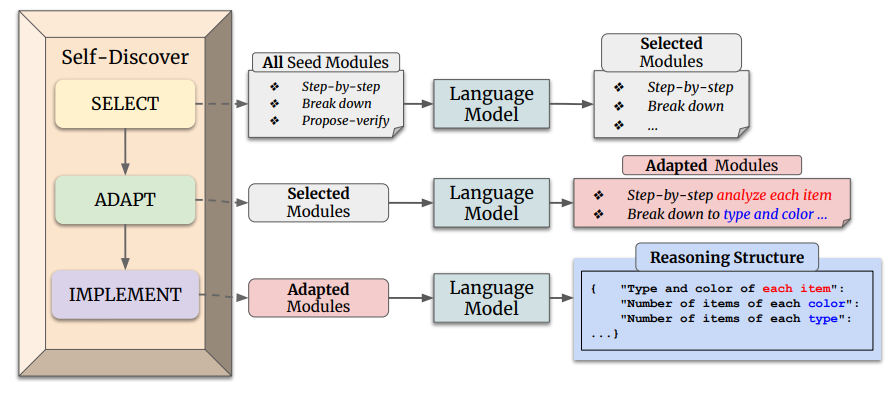
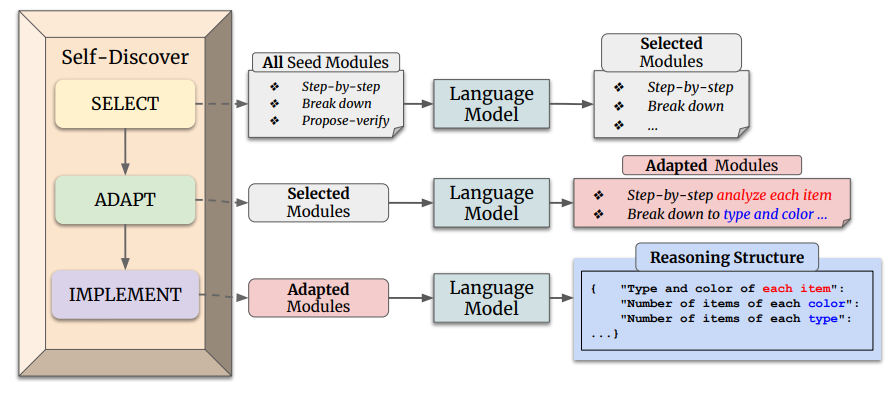

#### **SELECT :** 
Not every reasoning module is helpful for every task, so the first stage of **SELF-DISCOVER** guides model to **select** modules that are useful based on task .For example, “reflective thinking” might help search for first-principle theories on science problems, while “creative thinking” helps on generating a novel continuation to a story.

SELF-DISCOVER first selects a subset of reasoning modules $D_S$ that are useful for solving the tasks by using a model $M$ and a meta-prompt $p_S$:

$D_S = M(p_S ∥ D ∥ t_i)$

#### **ADAPT :** 
Since each reasoning module provides a general description of how to solve problems, the next step of **SELFDISCOVER** aims at tailoring each selected module to the task at hand. 

Given selected reasoning module subset $D_S$ from the previous step, **ADAPT** rephrases each of the selected module to be more specific to the task. Similarly to SELECT, this stage uses a meta-prompt $p_A$ and a generative model $M$ to generate the adapted reasoning module descriptions $D_A$:

$D_A = M(p_A ∥ D_S ∥ t_i)$


#### **IMPLEMENT :**
Finally, given the adapted reasoning module descriptions $D_A$, **SELF-DISCOVER** operationalizes the reasoning modules into an implemented reasoning structure $D_I$ with specified instruction on what to generate for each step. In addition to a meta prompt $p_I$ , **IMPLEMENT**
also provides a demonstration of a human-written reasoning structure $S_{human}$ on another task to better convert the natural language descriptions into a reasoning structure:

$D_I = M(p_A ∥ S_{human} ∥ D_A ∥ t_i)$.

### **Stage 2: Tackle Tasks Using Discovered Structures**
After the three stages, we have an implemented reasoning structure $D_I$ uniquely adapted for the task we need to solve $T$. Then we can simply append the reasoning structure to all instances of the task and prompt models to follow the reasoning structure to generate an answer $A$:

$A = M(D_S ∥ t), ∀t ∈ T$

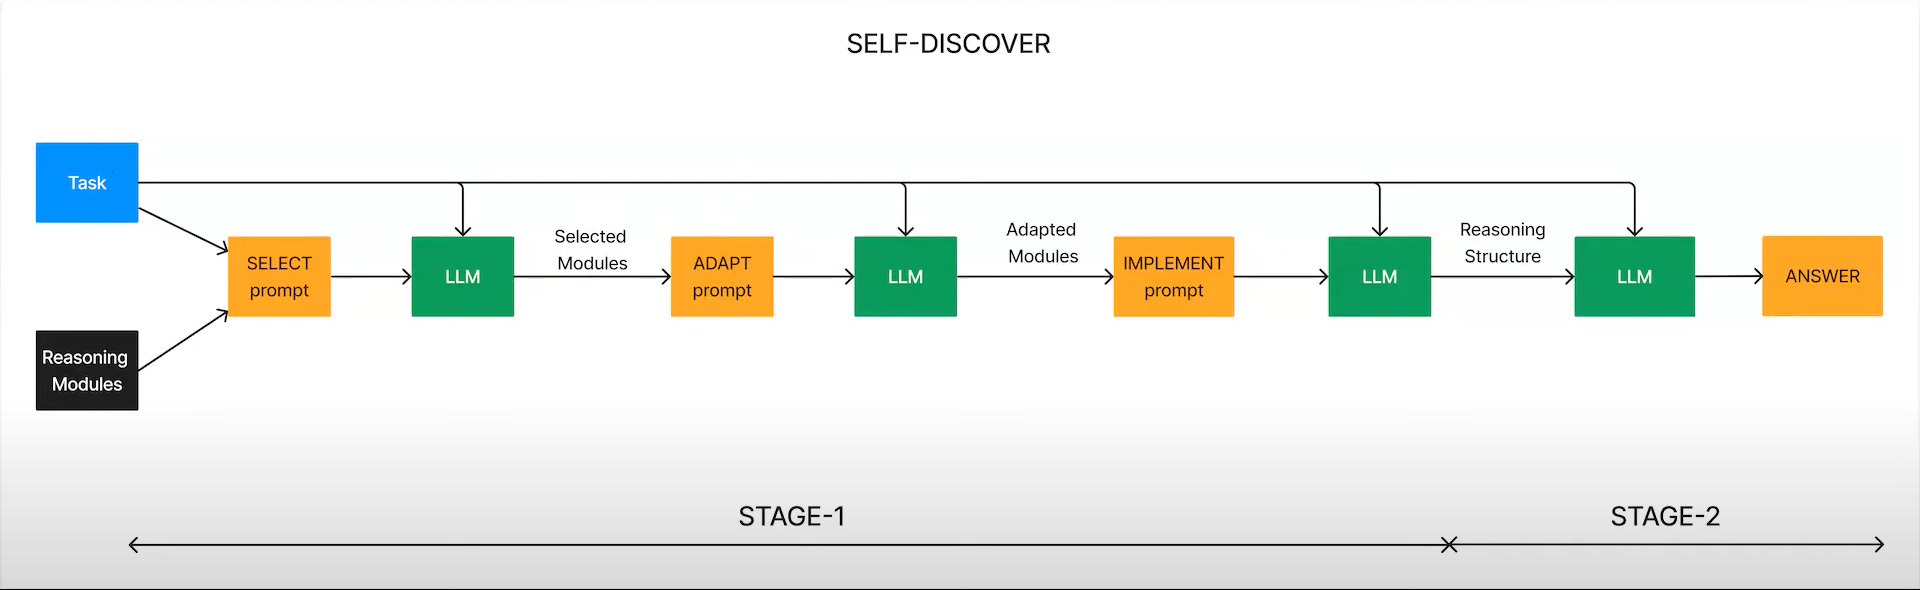

# My Implementation :

What I have not included :
- In the paper they use json format during reasoning in stage 1 but I have not used it.
-  I have also not provided uman-written reasoning structure $S_{human}$ .

Without them still the method performs pretty well on the tasks given , proving the idea behind the method.

# **Code**:

### **🚚 Imports**

In [1]:
import google.generativeai as genai
import warnings
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
api_key = user_secrets.get_secret("Gemini_api")
genai.configure(api_key=api_key)
warnings.filterwarnings('ignore')

### **Gemini :**

In [2]:
model_guide=genai.GenerativeModel("gemini-pro")
safety_settings = [
    {
        "category": "HARM_CATEGORY_DANGEROUS",
        "threshold": "BLOCK_NONE",
    },
    {
        "category": "HARM_CATEGORY_HARASSMENT",
        "threshold": "BLOCK_NONE",
    },
    {
        "category": "HARM_CATEGORY_HATE_SPEECH",
        "threshold": "BLOCK_NONE",
    },
    {
        "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
        "threshold": "BLOCK_NONE",
    },
    {
        "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
        "threshold": "BLOCK_NONE",
    },
]

### **Resoning Structure Used :**

They are the exact same that are used in the paper .

In [3]:
REASONING_MODULES = [
    "1. How could I devise an experiment to help solve that problem?",
    "2. Make a list of ideas for solving this problem, and apply them one by one to the problem to see if any progress can be made.",
    "3. How could I measure progress on this problem?",
    "4. How can I simplify the problem so that it is easier to solve?",
    "5. What are the key assumptions underlying this problem?",
    "6. What are the potential risks and drawbacks of each solution?",
    "7. What are the alternative perspectives or viewpoints on this problem?",
    "8. What are the long-term implications of this problem and its solutions?",
    "9. How can I break down this problem into smaller, more manageable parts?",
    "10. Critical Thinking: This style involves analyzing the problem from different perspectives, questioning assumptions, and evaluating the evidence or information available. It focuses on logical reasoning, evidence-based decision-making, and identifying potential biases or flaws in thinking.",
    "11. Try creative thinking, generate innovative and out-of-the-box ideas to solve the problem. Explore unconventional solutions, thinking beyond traditional boundaries, and encouraging imagination and originality.",
    "12. Seek input and collaboration from others to solve the problem. Emphasize teamwork, open communication, and leveraging the diverse perspectives and expertise of a group to come up with effective solutions.",
    "13. Use systems thinking: Consider the problem as part of a larger system and understanding the interconnectedness of various elements. Focuses on identifying the underlying causes, feedback loops, and interdependencies that influence the problem, and developing holistic solutions that address the system as a whole.",
    "14. Use Risk Analysis: Evaluate potential risks, uncertainties, and tradeoffs associated with different solutions or approaches to a problem. Emphasize assessing the potential consequences and likelihood of success or failure, and making informed decisions based on a balanced analysis of risks and benefits.",
    "15. Use Reflective Thinking: Step back from the problem, take the time for introspection and self-reflection. Examine personal biases, assumptions, and mental models that may influence problem-solving, and being open to learning from past experiences to improve future approaches.",
    "16. What is the core issue or problem that needs to be addressed?",
    "17. What are the underlying causes or factors contributing to the problem?",
    "18. Are there any potential solutions or strategies that have been tried before? If yes, what were the outcomes and lessons learned?",
    "19. What are the potential obstacles or challenges that might arise in solving this problem?",
    "20. Are there any relevant data or information that can provide insights into the problem? If yes, what data sources are available, and how can they be analyzed?",
    "21. Are there any stakeholders or individuals who are directly affected by the problem? What are their perspectives and needs?",
    "22. What resources (financial, human, technological, etc.) are needed to tackle the problem effectively?",
    "23. How can progress or success in solving the problem be measured or evaluated?",
    "24. What indicators or metrics can be used?",
    "25. Is the problem a technical or practical one that requires a specific expertise or skill set? Or is it more of a conceptual or theoretical problem?",
    "26. Does the problem involve a physical constraint, such as limited resources, infrastructure, or space?",
    "27. Is the problem related to human behavior, such as a social, cultural, or psychological issue?",
    "28. Does the problem involve decision-making or planning, where choices need to be made under uncertainty or with competing objectives?",
    "29. Is the problem an analytical one that requires data analysis, modeling, or optimization techniques?",
    "30. Is the problem a design challenge that requires creative solutions and innovation?",
    "31. Does the problem require addressing systemic or structural issues rather than just individual instances?",
    "32. Is the problem time-sensitive or urgent, requiring immediate attention and action?",
    "33. What kinds of solution typically are produced for this kind of problem specification?",
    "34. Given the problem specification and the current best solution, have a guess about other possible solutions."
    "35. Let’s imagine the current best solution is totally wrong, what other ways are there to think about the problem specification?"
    "36. What is the best way to modify this current best solution, given what you know about these kinds of problem specification?"
    "37. Ignoring the current best solution, create an entirely new solution to the problem."
    "38. Let’s think step by step ."
    "39. Let’s make a step by step plan and implement it with good notation and explanation.",
]

REASONING_MODULES = "\n".join(REASONING_MODULES)



### **STAGE 1 :**

**SELECT Phase :**

In [4]:
def select_prompt(task):
    return f"Given the task: {task}, which of the following reasoning modules are relevant? Do not elaborate on why.\n\n {REASONING_MODULES}.\n Note : Give full selected reasoning modules."

In [5]:
def SELECT(task):
    prompt_for_model=select_prompt(task)
    response = model_guide.generate_content(prompt_for_model,safety_settings=safety_settings)
    response=response.text
    return response

**ADAPT Phase :**

In [6]:
def adapt_prompt(task, selected_modules):
    return f"Without working out the full solution, adapt the following reasoning modules to be specific to our task:\n{selected_modules}\n\nOur task:\n{task}"

In [7]:
def ADAPT(task,selected_modules):
    prompt_for_model=adapt_prompt(task,selected_modules)
    response = model_guide.generate_content(prompt_for_model,safety_settings=safety_settings)
    response=response.text
    return response

**IMPLEMENT Phase :**

In [8]:
def implement_prompt(task,adapted_modules):
    return f"Without working out the full solution, create an actionable reasoning structure for the task using these adapted reasoning modules:\n{adapted_modules}\n\nTask Description:\n{task}"

In [9]:
def IMPLEMENT(task,adapted_modules):
    prompt_for_model=implement_prompt(task,adapted_modules)
    response = model_guide.generate_content(prompt_for_model,safety_settings=safety_settings)
    response=response.text
    return response

### **STAGE 2 :**

In [10]:
def reasoning_prompt(task,reasoning_structure):
    return f"Using the following reasoning structure: {reasoning_structure}\n\nSolve this task, providing your final answer: {task}"

In [11]:
def final_ans(task,reasoning_structure):
    prompt_for_model=reasoning_prompt(task,reasoning_structure)
    response = model_guide.generate_content(prompt_for_model,safety_settings=safety_settings)
    response=response.text
    return response

### **Main Block :**

In [12]:
def main():
    task="Count number of e in 'engineer."
    selected_modules=SELECT(task)
    print("Selected Modules : \n",selected_modules)
    adapted_modules=ADAPT(task,selected_modules)
    print("Adapted Modules : \n",adapted_modules)
    reasoning_structure=IMPLEMENT(task,adapted_modules)
    final_answer=final_ans(task,reasoning_structure)
    print("\n",final_answer)

In [13]:
main()

Selected Modules : 
 16. What is the core issue or problem that needs to be addressed?
19. What are the potential obstacles or challenges that might arise in solving this problem?
20. Are there any relevant data or information that can provide insights into the problem? If yes, what data sources are available, and how can they be analyzed?
Adapted Modules : 
 16. What is the core issue or problem that needs to be addressed?
- Counting the number of occurrences of the letter 'e' in the word 'engineer'.

19. What are the potential obstacles or challenges that might arise in solving this problem?
- None identified.

20. Are there any relevant data or information that can provide insights into the problem? If yes, what data sources are available, and how can they be analyzed?
- The word 'engineer' is the only relevant data. It can be analyzed by simply counting the number of occurrences of the letter 'e'.

 **Reasoning Structure:**

1. **Identify the problem:** Count the number of occurren

# Why To Use This Method :

According to the paper :
- SELFDISCOVER **outperforms** inference-intensive methods such as **CoT-Self-Consistency** by more than **20%**, while requiring **10-40x fewer inference compute**.
- Depending on the model it outperforms CoT in almost **20/24 taskes** in BBH.


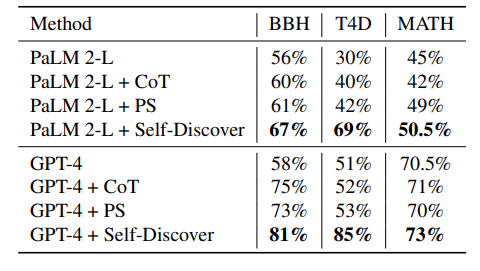

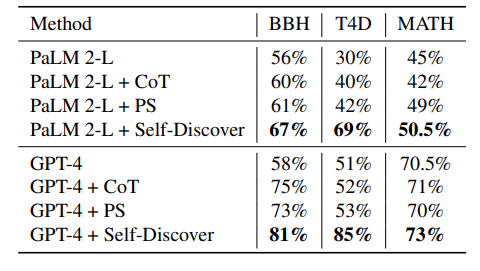